## Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
##reading data
loan=pd.read_csv('loan.csv',encoding='palmos')
loan

C:\Users\shail\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
##data
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [498]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [499]:
loan.shape


(39717, 111)

In [500]:
##null values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [501]:
##percentage of null values
round(loan.isnull().sum()/len(loan.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [502]:
##dropping 100% missing value columns 
drop_col=['tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']
loan.drop(drop_col,axis='columns',inplace=True)


In [503]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                        0.0
member_id                 0.0
loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
                        ...  
num_tl_op_past_12m      100.0
pct_tl_nvr_dlq          100.0
percent_bc_gt_75        100.0
pub_rec_bankruptcies      2.0
tax_liens                 0.0
Length: 107, dtype: float64

In [504]:
##since there are more columns with null values we will remove null value columns more than 90%
null_col=loan.columns[(loan.isnull().sum()/len(loan.index)*100)>90]

In [505]:
null_col

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [506]:
##dropping null columns
loan.drop(null_col,axis='columns',inplace=True)

In [507]:
loan.shape

(39717, 55)

In [508]:
##checking for null value columns again
round(loan.isnull().sum()/len(loan.index),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [509]:
loan.shape

(39717, 55)

In [510]:
##lets look into 'mths_since_last_delinq' which has 65% null values and also 'desc' 
loan.loc[:,'mths_since_last_delinq'].head()


0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [511]:
loan.loc[:,'desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [512]:
loan['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                        

In [513]:
loan['mths_since_last_delinq'].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
106.0      1
120.0      1
95.0       1
85.0       1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [514]:
##since 'desc' contains Loan description provided by the borrower it contains many null values it may  not be useful for our analysis
##'mths_since_last_delinq' column contains The number of months since the borrower's last delinquency and it hass lot of null values so we dropping it
loan.drop(['mths_since_last_delinq','desc'],axis='columns',inplace=True)

In [515]:
##check again for null values
round(loan.isnull().sum()/len(loan.index),2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [516]:
loan.shape

(39717, 53)

In [517]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [518]:
##lets check null values in rows
loan.isnull().sum(axis=0)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [519]:
loan['emp_title'].value_counts()

US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
Kaiser Permanente                    56
                                   ... 
Henry County Board of Education       1
Hendrickson Electric                  1
Grays Harbor Communications           1
Macado's Restaurants, Inc             1
Regional Transportation District      1
Name: emp_title, Length: 28820, dtype: int64

In [520]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [521]:
###since employment is crucial part in paying loan we are not going to drop 'emp_length','emp_title' columns we drop only missing values
#i.e Nan
loan['emp_length'].dropna()
loan['emp_title'].dropna()

1                             Ryder
3               AIR RESOURCES BOARD
4          University Medical Group
5              Veolia Transportaton
6         Southern Star Photography
                    ...            
39710             Rush Univ Med Grp
39711           A. F. Wolfers, Inc.
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39716              Evergreen Center
Name: emp_title, Length: 37258, dtype: object

In [522]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [523]:
##check for row wise null values 
null_rows=loan.isnull().sum(axis=1)
null_rows.value_counts()
##we got very few null values so we can leave them

0    36431
1     2168
2     1054
4       34
3       23
5        7
dtype: int64

In [524]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [525]:
##shape
loan.shape

(39717, 53)

In [526]:
##check for data types and each column values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [527]:
loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [528]:
#Removing % sign from interest rate column and converting into float
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

In [529]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [530]:
loan.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [531]:
#finding number of unique values in categorical variables
l1=loan.collections_12_mths_ex_med.unique()
l1


array([ 0., nan])

In [532]:
l2=loan.tax_liens.unique()
l2

array([ 0., nan])

In [533]:
l3=loan.chargeoff_within_12_mths.unique()
l3

array([ 0., nan])

In [534]:
#Dropping collections_12_mths_ex_med,chargeoff_within_12mnths and tax liens as they have either 0 or nan as unique and wont be significant analysis
drop_column = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_column,axis=1)

In [535]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [536]:
loan.pub_rec_bankruptcies.value_counts()
#public record bankruptcy column is crucial to understand defaulter.

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [537]:
#We see there aer over 90% null values in this column,imputing can create bias so we will remove null values
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,151536,4800,4800,1100.0,36 months,10.28,155.52,C,C1,...,0.00,0.00,Aug-08,3891.08,Aug-08,1,INDIVIDUAL,0,0,1.0
39573,150940,150893,7000,7000,1000.0,36 months,10.59,227.82,C,C2,...,0.00,0.00,May-10,1571.29,Apr-16,1,INDIVIDUAL,0,0,1.0
39623,132892,132889,9000,9000,700.0,36 months,12.49,301.04,D,D3,...,1909.87,668.36,May-08,301.05,May-16,1,INDIVIDUAL,0,0,1.0
39666,119043,119040,15450,15450,600.0,36 months,11.22,507.46,C,C4,...,304.20,3.09,Oct-09,1016.15,Mar-10,1,INDIVIDUAL,0,0,1.0


In [538]:
loan=loan[~loan.emp_title.isnull()] #further checking if employee title and employment length has no null valuesby filtering 
loan=loan[~loan.emp_length.isnull()]
loan.shape

(36548, 50)

In [539]:
miss= round(100*(loan.isnull().sum()/len(loan.index)), 2) 
miss[miss != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [540]:
#There are only 3 columns with small percentage of missing values.Dropping rows with null values
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan.shape

(36433, 50)

In [541]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [542]:
#From checking unique values in each column,we see many columns with single unique value and redundant column after referring to data dictionary.Let us remove these to further narrow down our analysis
remove = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan=loan.drop(remove,axis=1)
#loan amount is equal to funded amt and funded amt invested so to avoid redundancy we have to removed funded amt and funded amt inv.Columns like zip code,id,member id,url,payement plan,policy code,application type,delinq amt,acc_now_delinq do not contribute to the analysis hence are dropped. 

In [543]:
loan.shape

(36433, 38)

In [544]:
date_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[date_columns].info()
#converting the date columns to standard datetime type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [545]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [546]:
loan[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [547]:
#Removing % sign from revolving utilisation rate column
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float') 

In [548]:
#Removing months from term column by split method and lambda function
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [549]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,36433.000000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,12.073862,326.186394,6.930522e+04,13.444131,0.146131,0.86493,9.351604,0.053715,13465.657481,...,52.213313,12310.968657,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,3.734758,207.389943,6.354244e+04,6.643308,0.492199,1.06343,4.373772,0.234995,15702.093047,...,378.443825,9048.420885,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,9.320000,168.900000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,0.000000,3832.000000,...,0.000000,5672.557913,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,11.860000,283.280000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,0.000000,9030.000000,...,0.000000,10101.589360,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,14.650000,432.220000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,0.000000,17231.000000,...,0.000000,16700.719980,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,4.000000,149588.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [550]:
#The month the borrower's earliest reported credit line was opened,extracting month and year from earliest_cr_line column
loan['earliest_cr_line_month'] =loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] =loan['earliest_cr_line'].dt.year


In [551]:
#checking if any year exceeds 2011 as data is till 2011.
len(loan[loan['earliest_cr_line_year'] > 2011 ])

50

In [552]:
#there are 50 dates that exceed 2011

In [553]:
#checking employee length column and changing the format to 0 to 10 as per description in data dictionary
#Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#formatting this column
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [554]:
emp_len_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [555]:
loan =loan.replace({"emp_length": emp_len_dict })

In [556]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [557]:
#understanding and cleaning years for earliest cr line year column
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [558]:
#subtracting 100 from those year which are greater than 2011 to correct the year(these are 20th century not 21st century)
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [559]:
loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [560]:
#Analysis
#Finding derived variables by splitting date in month and year
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [561]:

#Before we start the analysis:we filter out 'current' loan status candidates as they are not useful in prediction of defaulters.
loan=loan[~(loan['loan_status']== 'Current')]
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,12,2000,12,2007
39562,4800,36,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,3,2000,11,2007
39623,9000,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,8,1997,10,2007
39666,15450,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,11,1992,8,2007


In [562]:
loan.shape

(35367, 42)

## univariate analysis

In [563]:
loan['loan_status'].value_counts()
#Converting loan_status into a numeric variable for better analysis,assigning value 0 to Charged off and 1 to fully paid customers
#using binary encoding to convert categorical to numeric column
loan_status_dict={'Charged Off': 0,'Fully Paid':1}
loan =loan.replace({"loan_status": loan_status_dict})


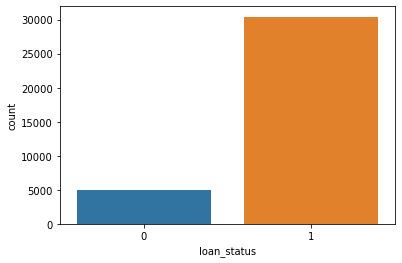

In [564]:
sns.countplot(loan['loan_status'])
plt.show()
#About 13.5 % of borrowers were defaulted.

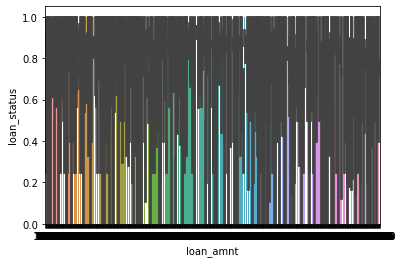

In [602]:

sns.barplot(data=loan, x="loan_amnt", y="loan_status", estimator=np.mean)
plt.show()

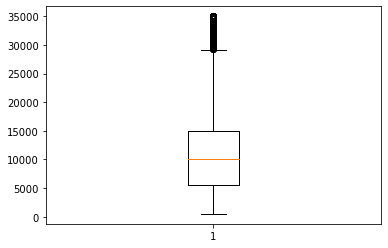

In [603]:
##lets look at loan_amnt
plt.boxplot(loan['loan_amnt'])
plt.show()

In [604]:
loan['loan_amnt'].describe()
##loan amount lies between minimum of 500 and maximum of 35000 (mean of 10,000)

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

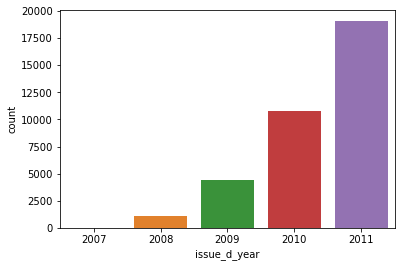

In [605]:
sns.countplot(loan['issue_d_year'])
plt.show()
#most loans are issued in 2011

In [606]:
loan['issue_d_month'].value_counts()

12    3820
11    3678
10    3436
9     3276
8     3188
7     3115
6     2977
5     2745
4     2669
3     2395
1     2048
2     2020
Name: issue_d_month, dtype: int64

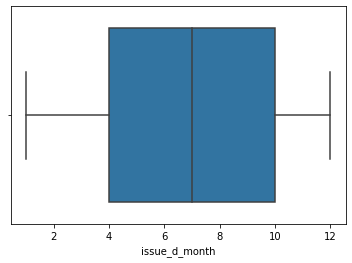

In [607]:
sns.boxplot(loan['issue_d_month'])
plt.show()

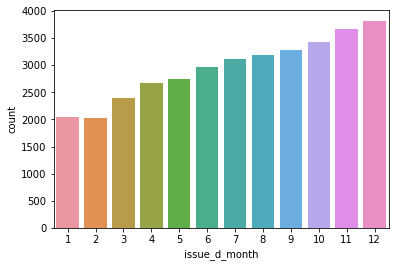

In [608]:
sns.countplot(loan['issue_d_month'])
plt.show()

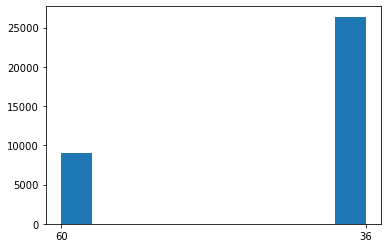

In [611]:
plt.hist(loan['term'])
plt.show()
#Univariate analysis of term payment.

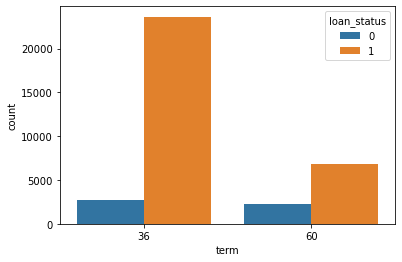

In [680]:
sns.countplot(x='term',hue='loan_status',data=loan)
# We can clearly see loans with 36 months term have on an average higher loan payment.This is a bivariate analysis as there are 2 variables involved.

In [613]:
loan['term'].value_counts()
##most loan payments are in 36 months

36    26377
60     8990
Name: term, dtype: int64

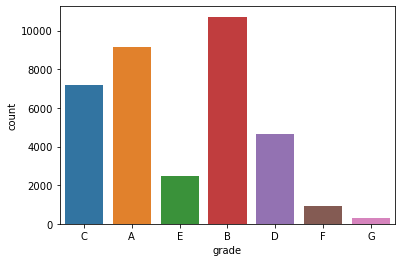

In [614]:
sns.countplot(loan['grade'])
plt.show()


##### most of the loan  belongs to A and B category

In [615]:
loan['emp_length'].value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

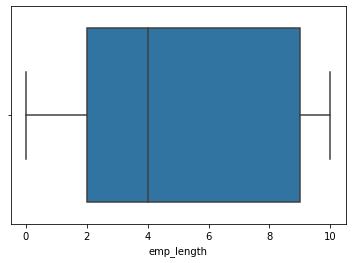

In [616]:
sns.boxplot(loan['emp_length'])
plt.show()

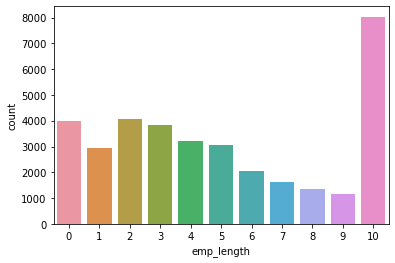

In [679]:
sns.countplot(loan['emp_length'])
plt.show()

#### most of the employees applying for loan have over 10yrs experience

In [618]:
loan['home_ownership'].value_counts()

RENT        17065
MORTGAGE    15703
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

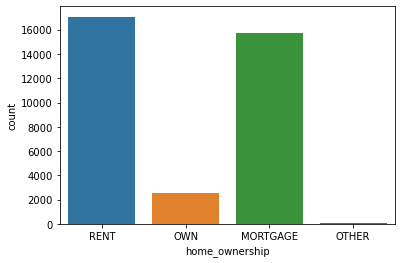

In [619]:
sns.countplot(loan['home_ownership'])
plt.show()


#### most of the people applying for loan  has rent and mortage based houses

In [620]:
loan['annual_inc'].value_counts()

False    35367
Name: annual_inc, dtype: int64

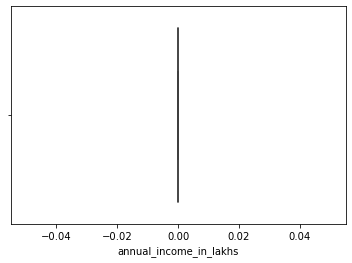

In [621]:
sns.boxplot(loan['annual_inc'])
plt.xlabel('annual_income_in_lakhs')
plt.show()

##### there are two people having annual income of more than 30 lakhs
##### so  lets remove outliers

In [622]:
loan['annual_inc']=loan['annual_inc']<3000

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


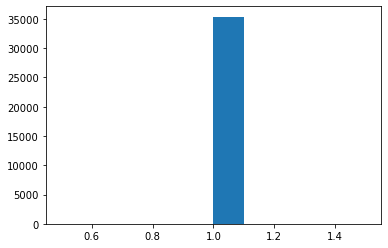

In [623]:
plt.hist(loan['annual_inc'])
plt.show()


C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


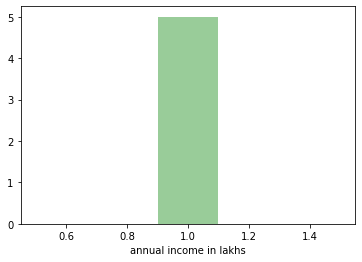

In [624]:
sns.distplot(loan['annual_inc'],color='g',bins=5)
plt.xlabel('annual income in lakhs')
plt.show()

#### most applicants have annual income less than 5lakhs

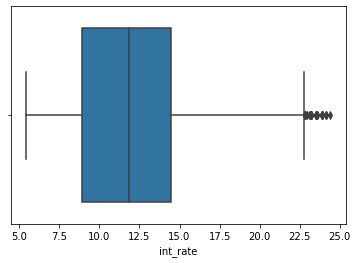

In [625]:
sns.boxplot(loan['int_rate'])
#plt.xlabel('post charge of gross recovery')
plt.show()

In [626]:
loan['int_rate'].describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

#### interest rate lie between min of 4.20 and max of 24.400

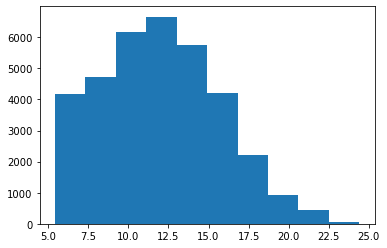

In [627]:
plt.hist(loan['int_rate'])
plt.show()

In [628]:
loan['int_rate'].sort_values(ascending=False)

13492    24.40
5964     24.11
1619     24.11
1799     24.11
3655     23.91
         ...  
23375     5.42
15254     5.42
23355     5.42
23351     5.42
10513     5.42
Name: int_rate, Length: 35367, dtype: float64

In [629]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    33898
1.0     1464
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

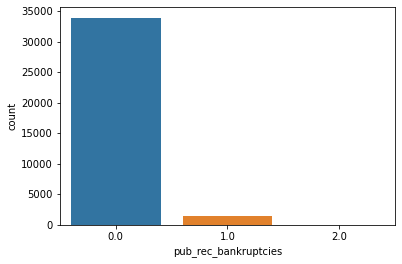

In [630]:
sns.countplot(loan['pub_rec_bankruptcies'])
plt.show()

## segmented univariate analysis

##### majority of the applicants have annual_income less than 5 lakhs

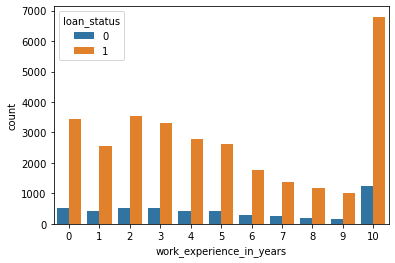

In [631]:
#### our target variable is loan_status 

sns.countplot(x='emp_length',hue='loan_status',data=loan)
plt.xlabel('work_experience_in_years')

plt.show()

#### people having 10years of work experience cause more defaults

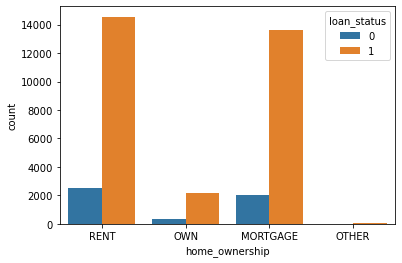

<Figure size 720x360 with 0 Axes>

In [632]:
sns.countplot(x='home_ownership',hue='loan_status',data=loan)
plt.figure(figsize=(10,5))
plt.show()

##### people having mortgage and rent based houses cause more defaults

In [633]:
#Now we plot the relation between loan status and grade

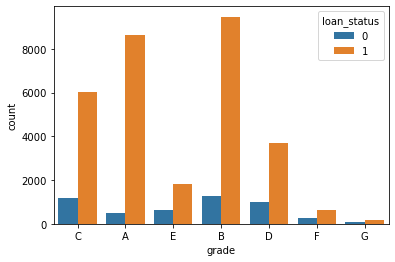

In [634]:
sns.countplot(x=loan['grade'],hue=loan['loan_status'])
plt.show()

#### B,C,D are top3  loan grades causes more defaults

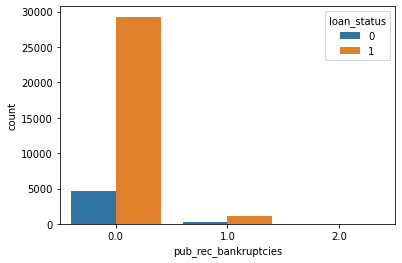

In [635]:
sns.countplot(hue=loan['loan_status'],x=loan['pub_rec_bankruptcies'])
plt.show()

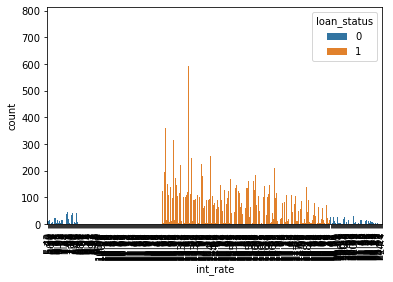

In [686]:
sns.countplot(x='int_rate',hue='loan_status',data=loan)
plt.xticks(rotation=90)
plt.show()

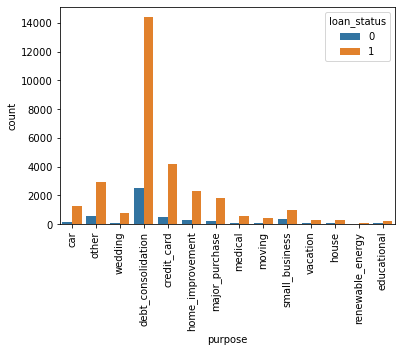

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [636]:
sns.countplot(hue=loan['loan_status'],x=loan['purpose'])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,10))

#### Applicants having purpose of debt_consolidation causes more defaults

## bivariate analysis

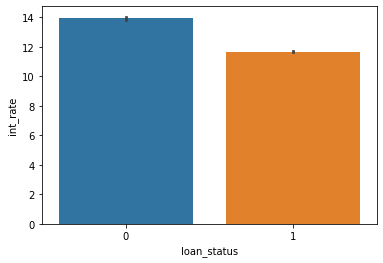

In [637]:
sns.barplot(x='loan_status',y='int_rate',data=loan,estimator=np.mean)
plt.show()

#### Applicants having interest rate around 14 leads to more defaults.

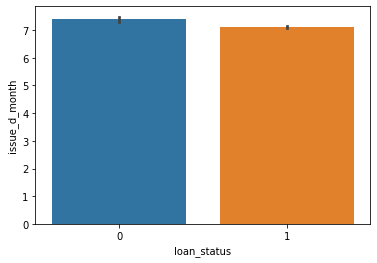

In [638]:
sns.barplot(x='loan_status',y='issue_d_month',data=loan)
plt.show()

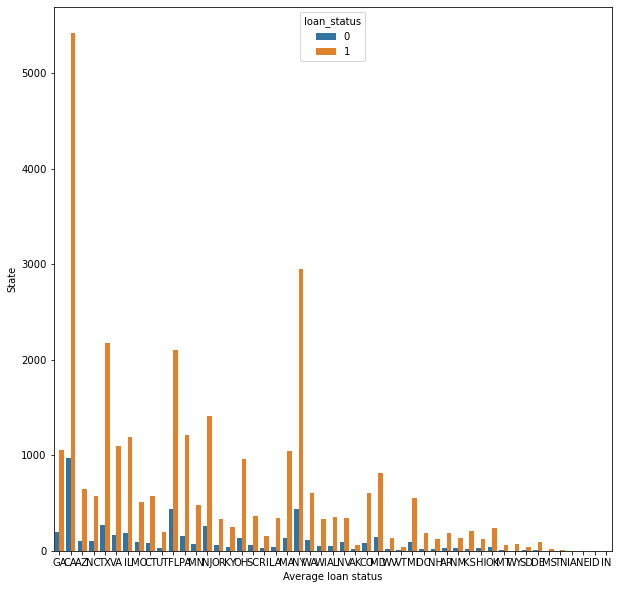

In [674]:

plt.figure(figsize=(10,10))
sns.countplot(x="addr_state", hue="loan_status", data=loan)
plt.xlabel('Average loan status')
plt.ylabel('State')
plt.show()

####From the Above countplot,its clear that: Applicants from California State have high chance to default

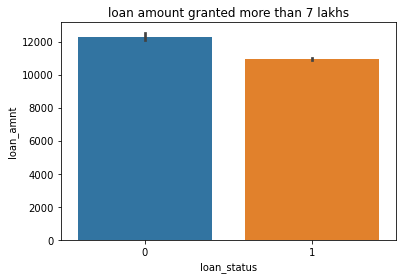

In [675]:
loan_agg = loan[loan['loan_amnt'] > 7000].groupby(['loan_status'])['loan_amnt'].count().reset_index()
sns.barplot(x='loan_status',y='loan_amnt',data=loan)
plt.title('loan amount granted more than 7 lakhs')
plt.show()

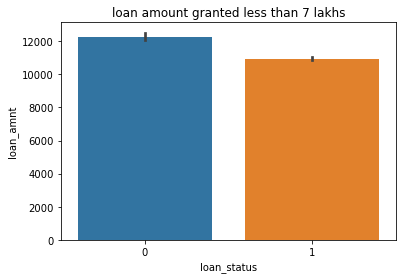

In [676]:
loan_agg = loan[loan['loan_amnt'] <7000].groupby(['loan_status'])['loan_amnt'].count().reset_index()
sns.barplot(x='loan_status',y='loan_amnt',data=loan)
plt.title('loan amount granted less than 7 lakhs')
plt.show()

In [646]:
loan['installment'].value_counts()

311.11    65
311.02    53
180.96    52
150.80    43
368.45    43
          ..
465.32     1
496.91     1
375.66     1
345.21     1
369.84     1
Name: installment, Length: 14028, dtype: int64

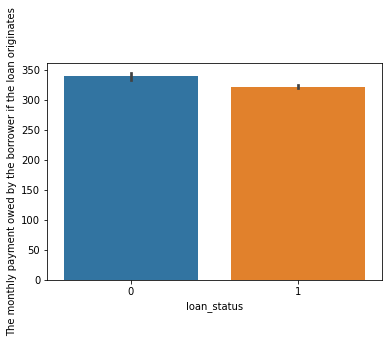

In [647]:
sns.barplot(x='loan_status',y='installment',data=loan,estimator=np.mean)
plt.ylabel('The monthly payment owed by the borrower if the loan originates')
plt.show()

### applicants having installment less than 350 cause more defaults

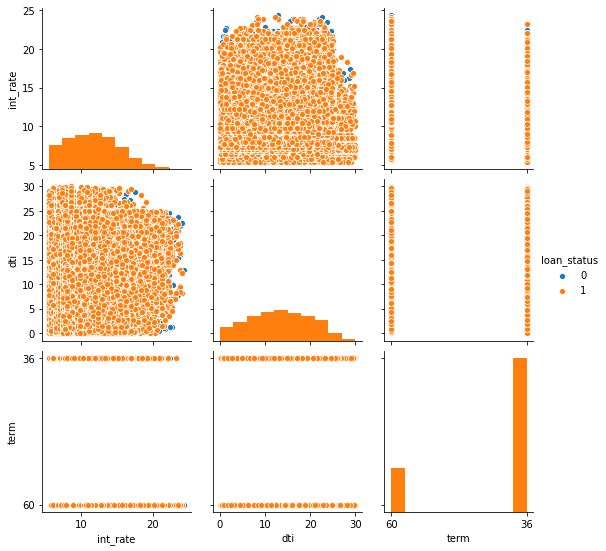

In [648]:
#Using pairplot to understand correlation between loan status and term,loan status and interest rate,loan status and dti(debt paid to income ratio)
sns.pairplot(loan, hue="loan_status", diag_kind="hist",vars=['int_rate','dti','term'])

In [110]:
#From the above plot,we can infer that there is relation between dti and interest rate for charged off customers.As we have already found out effect of interest rate on loan status.There is no need to consider dti.

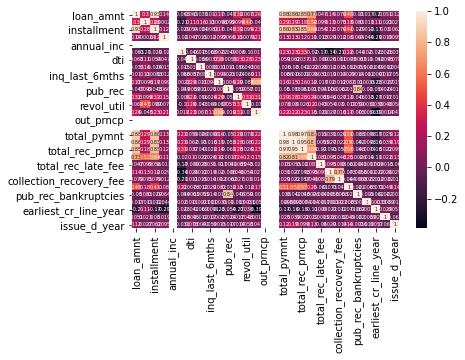

In [677]:
sns.heatmap(loan.corr(), annot = True,annot_kws={"size": 5})

In [ ]:
#From the above heatmap we can see there is a strong correlation between loan_amount and installment.

#After performing univariate,segmented univariate and bi-variate analysis on loan data set.We have identified driver variables that leads to default.After understanding relationship between loan status of borrowers,customer and loan attributes.Following Conclusion are drawn,
Inferences after analysis of customer and loan attributes and key driver variables for default.

1.Most of the loan  belongs to A and B category.Grade B,C,D are top 3 loan grades that increases tendency of default.
2.Applicants with over 10 years of experience have high probability to default.
3.Applicants from California State have a high chance of default.
4.Applicants having installments less than 350 causes more default.
5.Applicants with interest rate around 14 leads to more default.
6.Applicants having purpose of debt_consolidation causes more defaults.
7.Applicants having mortgage and rent based houses cause more defaults